# Simulacro Parcial 1

Natalia Villegas Calderon - 202113370

## Caso Inicial Clínica de los Alpes
La Clínica de los Alpes es una IPS colombiana con varios años de operación en la capital. Esta institución posee varias unidades de cuidado especializado para pacientes con diferentes tipos de patologías y necesidades de atención.

Sin embargo, al igual que muchas entidades de las mismas características, uno de los mayores problemas que enfrenta la Clínica es el de los reingresos médicos. Un reingreso médico ocurre cuando un paciente que se ha dado de alta debe ser nuevamente admitido por complicaciones relacionadas con su ingreso original en plazos de 30 días, 90 días o hasta un año, de acuerdo con las definiciones de la OMS.

Los reingresos son problemáticos porque pueden ser un signo de complicaciones o empeoramiento de la condición médica del paciente, lo que pone en riesgo su salud y bienestar. Esto puede generar frustración y ansiedad por parte del paciente al igual que aumentar el riesgo de contraer infecciones dentro de la clínica. De igual manera, aumentan la carga financiera sobre la clínica, añadiendo costos acumulativos de cuidado, bloqueando el uso eficiente de recursos para atender a otros pacientes, generando sobrecostos para las facturas médicas que deben pagar los pacientes, causando impactos físicos y emocionales; y en últimas ocasionando pérdida de confianza en la institución de salud. 

Los reingresos son problemáticos porque pueden ser un signo de complicaciones o empeoramiento de la condición médica del paciente, lo que pone en riesgo su salud y bienestar. Esto puede generar frustración y ansiedad por parte del paciente al igual que aumentar el riesgo de contraer infecciones dentro de la clínica. De igual manera, aumentan la carga financiera sobre la clínica, añadiendo costos acumulativos de cuidado, bloqueando el uso eficiente de recursos para atender a otros pacientes, generando sobrecostos para las facturas médicas que deben pagar los pacientes, causando impactos físicos y emocionales; y en últimas ocasionando pérdida de confianza en la institución de salud. 

Por esta razón la Clínica de los Alpes ha financiado un proyecto de analítica basada en aprendizaje automático con el propósito de caracterizar los pacientes con reingresos, en particular los que han sido hospitalizados por diabetes. 

Considerando el caso asignado, los datos y el diccionario suministrado, proponga un proyecto con aprendizaje automático para alcanzar uno de los objetivos planteados por la empresa. Resuelva las siguientes preguntas e incluya sus respuestas y análisis en el cuaderno a entregar.


“Al entregar la solución de este parcial, yo, Natalia Villegas con código 202113370 me comprometo a no conversar durante el desarrollo de este examen con ninguna persona que no sea el profesor del curso, sobre aspectos relacionados con el parcial; tampoco utilizaré algún medio de comunicación por voz, texto o intercambio de archivos, para consultar o compartir con otros, información sobre el tema del parcial. Ni usaré alguna IA para resolver las preguntas del parcial. Soy consciente y acepto las consecuencias que acarreará para mi desempeño académico cometer fraude en este parcial”.

## Respuestas a las preguntas del parcial


### PREGUNTA 1: 
El objetivo de negocio de la Clínica de los Alpes es caracterizar a los pacientes con reingresos hospitalarios, particularmente aquellos con diabetes, con el fin de reducir la tasa de reingresos, optimizar los recursos de la institución y mejorar la calidad de atención. El aprendizaje automático es una opción adecuada porque permite analizar grandes volúmenes de datos de pacientes, identificar patrones ocultos en la información y segmentarlos en grupos con características comunes. Con este análisis, la clínica podrá anticipar el riesgo de reingreso y personalizar estrategias de atención para cada paciente, mejorando su experiencia y reduciendo costos asociados a hospitalizaciones repetitivas. Adicionalmente, el modelo puede ayudar a las decisiones clínicas y administrativas de la institución, permitiendo una gestión más eficiente de los recursos y una atención más oportuna y efectiva para los pacientes.

### PREGUNTA 2: 
Para abordar el problema de los reingresos hospitalarios en pacientes con diabetes, se empleará un enfoque de aprendizaje no supervisado, con técnicas de agrupacióN. En particular, se utilizará el algoritmo K-Means, ya que permite segmentar a los pacientes en grupos homogéneos según sus características clínicas e historial de hospitalización. El uso de K-Means facilitará la identificación de perfiles de pacientes con alto riesgo de reingreso, lo que permitirá a la clínica diseñar estrategias de intervención específicas para cada grupo. Además, este método es eficiente y fácil de interpretar, lo que lo hace ideal para el análisis exploratorio en la toma de decisiones médicas.

# 0. Carga de datos

In [46]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [47]:
df = pd.read_excel("diabetic_data.xlsx", header=None)
df.head()

,0
0,"race,num_lab_procedures,num_medications,age,ge..."
1,"Caucasian,88,32,5,F,9,9,0,1,1,1,Yes,Yes,Yes,0,..."
2,"Caucasian,43,19,6,F,4,8,1,1,2,1,Yes,Yes,Yes,0,..."
3,"Caucasian,24,8,5,M,4,5,0,17,2,1,No,No,No,0,0,No"
4,"Caucasian,4,8,6,F,1,8,0,7,1,1,No,No,No,0,0,Yes"


In [48]:
col = df.iloc[0, 0].split(',')
col

['race',
 'num_lab_procedures',
 'num_medications',
 'age',
 'gender',
 'time_in_hospital',
 'number_diagnoses',
 'num_procedures',
 'admission_source_id',
 'admission_type_id',
 'discharge_disposition_id',
 'insulin',
 'diabetesMed',
 'change',
 'number_inpatient',
 'number_emergency',
 'readmitted']

Se realiza el proceso necesario para construir adecuadamente el DF, en este se elimina la primera fila que eran los titulos, se separan las filas por coma y se le agregan las columnas correspondientes.

In [49]:
df = df.iloc[1:].reset_index(drop=True) 
df = df[0].str.split(',', expand=True)
df.columns = col
df.head()

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency,readmitted
0,Caucasian,88,32,5,F,9,9,0,1,1,1,Yes,Yes,Yes,0,0,Yes
1,Caucasian,43,19,6,F,4,8,1,1,2,1,Yes,Yes,Yes,0,0,No
2,Caucasian,24,8,5,M,4,5,0,17,2,1,No,No,No,0,0,No
3,Caucasian,4,8,6,F,1,8,0,7,1,1,No,No,No,0,0,Yes
4,AfricanAmerican,46,16,7,M,4,6,0,7,1,1,No,Yes,Yes,0,0,Yes


Los datos tienen 2000 registros y 17 columnas

In [50]:
df.shape

(2000, 17)

Se observan los datos cargados

In [51]:
df.dtypes

race                        object
num_lab_procedures          object
num_medications             object
age                         object
gender                      object
time_in_hospital            object
number_diagnoses            object
num_procedures              object
admission_source_id         object
admission_type_id           object
discharge_disposition_id    object
insulin                     object
diabetesMed                 object
change                      object
number_inpatient            object
number_emergency            object
readmitted                  object
dtype: object

Se evidencia que las columnas time_in_hospital, num_lab_procedures, num_procedures num_medications, number_outpatient, number_emergency, number_inpatient, number_diagnoses estan siendo reconocidas como objeto, cuando en el diccionario indican que son numero, por lo que es necesario convertirlas a numericas.

In [52]:
# Lista de variables cat
variables_cat= [
    "race", "gender", "age", "admission_type_id", 
    "discharge_disposition_id", "admission_source_id", 
    "insulin", "change", "diabetesMed"
]


variables_num = [
    "time_in_hospital", "num_lab_procedures", "num_procedures", 
    "num_medications",  "number_emergency",
    "number_inpatient", "number_diagnoses"
]

In [53]:

# Convertir las variables 
df[variables_num] = df[variables_num].apply(pd.to_numeric, errors='coerce').astype('Int64')

# Verificar cambios
df.dtypes

race                        object
num_lab_procedures           Int64
num_medications              Int64
age                         object
gender                      object
time_in_hospital             Int64
number_diagnoses             Int64
num_procedures               Int64
admission_source_id         object
admission_type_id           object
discharge_disposition_id    object
insulin                     object
diabetesMed                 object
change                      object
number_inpatient             Int64
number_emergency             Int64
readmitted                  object
dtype: object

# Entendimiento de datos

In [54]:
df.shape

(2000, 17)

### Atributos numericos

In [55]:
df.describe()

,num_lab_procedures,num_medications,time_in_hospital,number_diagnoses,num_procedures,number_inpatient,number_emergency
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,43.0985,15.764,4.357,7.3,1.477,0.159,0.0895
std,20.525897,8.246594,3.009166,1.903894,1.766644,0.522356,0.355743
min,1.0,1.0,1.0,3.0,0.0,0.0,0.0
25%,30.0,10.0,2.0,6.0,0.0,0.0,0.0
50%,44.0,14.0,4.0,8.0,1.0,0.0,0.0
75%,58.0,20.0,6.0,9.0,2.0,0.0,0.0
max,108.0,65.0,14.0,16.0,6.0,6.0,4.0


Se evidencia que los datos numericos estan entre rangos razonables

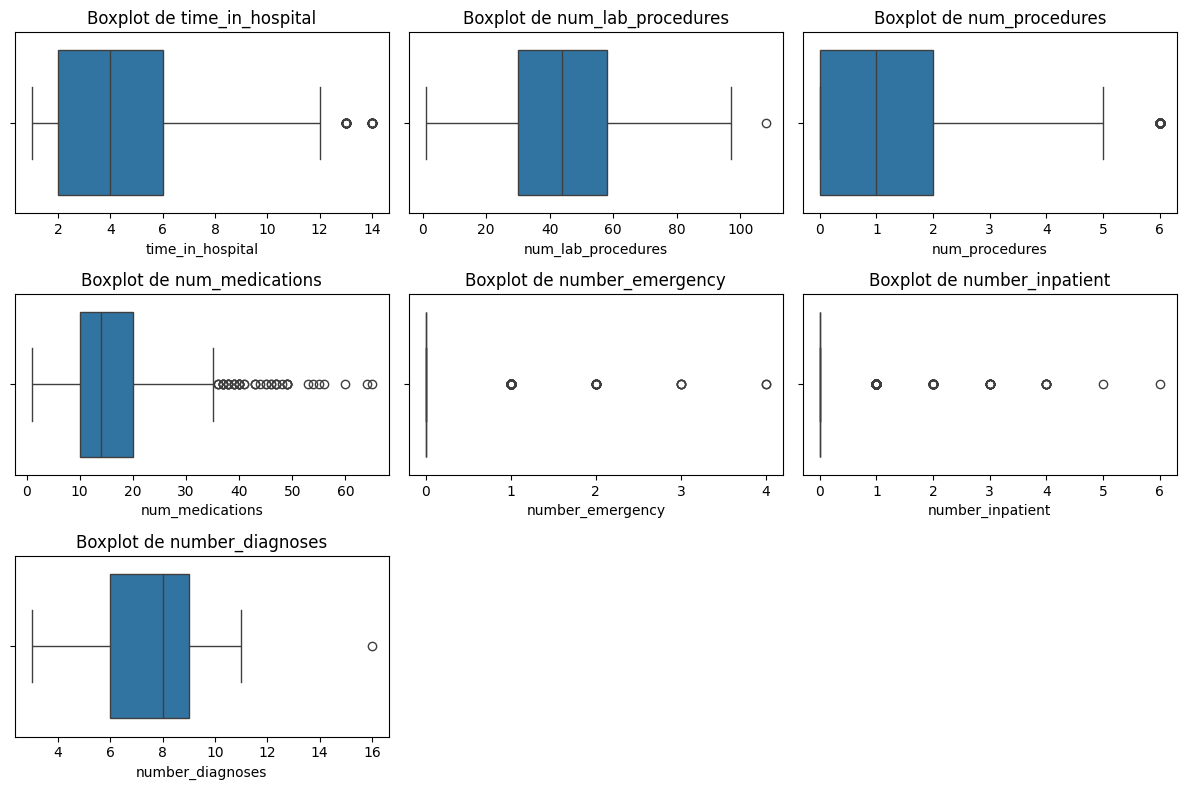

In [56]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(variables_num, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

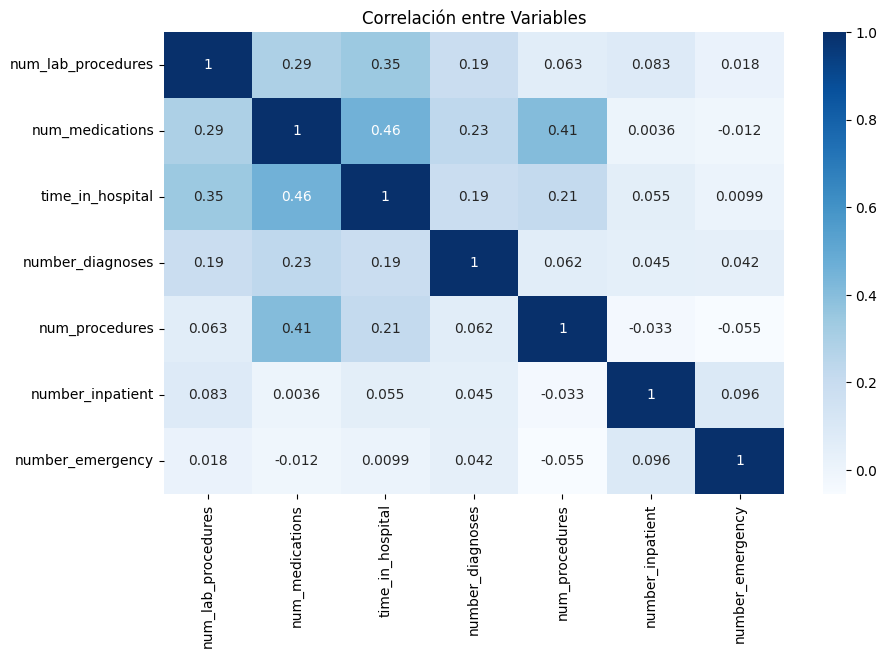

In [57]:
df_numeric = df.select_dtypes(include=["number"])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap = "Blues")

# Mostrar el gráfico
plt.title("Correlación entre Variables")
plt.show()


Como se evidencia en el mapa de correlacion, ninguna variable se encuentra muy correlacionada con otra, en especial, en el curso se evidencia que un buen indicativo de que una variable es necesario eliminar es cuando esta presenta una correlacion mayor a |0,8|, en este caso no se evidencia ninguna variable con esta correlacion.

Atributos categoricos

In [58]:
for col in variables_cat:
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts())


Distribución de race:
race
Caucasian          1475
AfricanAmerican     379
Other                97
Hispanic             36
Asian                13
Name: count, dtype: int64

Distribución de gender:
gender
F    1042
M     958
Name: count, dtype: int64

Distribución de age:
age
8     521
7     431
6     353
9     328
5     185
4      86
10     52
3      30
2      13
1       1
Name: count, dtype: int64

Distribución de admission_type_id:
admission_type_id
1    1010
3     384
2     361
6     135
5     101
8       9
Name: count, dtype: int64

Distribución de discharge_disposition_id:
discharge_disposition_id
1     1260
6      243
3      237
18      61
2       38
22      31
11      30
25      25
5       23
4       19
7        7
23       7
14       6
13       5
8        3
28       3
24       2
Name: count, dtype: int64

Distribución de admission_source_id:
admission_source_id
7     1055
1      629
17     146
4       66
6       41
2       31
5       20
3        5
9        4
20       3
Name: c

# Analisis de calidad de datos

## Completitud

In [59]:
porcentajeIncompletitudAtributo =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Atributo": porcentajeIncompletitudAtributo.index,
    "Completitud (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompletitud (%)": porcentajeIncompletitudAtributo.values
})

,Atributo,Completitud (%),Incompletitud (%)
0,race,100.0,0.0
1,admission_type_id,100.0,0.0
2,number_emergency,100.0,0.0
3,number_inpatient,100.0,0.0
4,change,100.0,0.0
5,diabetesMed,100.0,0.0
6,insulin,100.0,0.0
7,discharge_disposition_id,100.0,0.0
8,admission_source_id,100.0,0.0
9,num_lab_procedures,100.0,0.0


Como se puede evidenciar no hay datos faltantes

## Analisis de unicidad

In [60]:
registrosDuplicados = df.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = df.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"Se cuenta con {totalDuplicados} registros duplicados ({porcentajeDuplicados:.2f}%)")


Se cuenta con 25 registros duplicados (1.25%)


Se encuebntran varios registros duplicados, los cuales deben ser elimanos durante la limpieza de datos

## Analisis de Validez

Segun el diccionario dado se tienen los siguientes valores para las categorias

In [61]:
categorical_expected = {
    "race": ["Caucasian", "Asian", "African American", "Hispanic", "Other"],
    "gender": ["F", "M"],
    "insulin": ["Yes", "No"],
    "change": ["Yes", "No"],
    "diabetesMed": ["Yes", "No"],
}

In [62]:
# Verificación de variables categóricas esperadas
for col, expected_values in categorical_expected.items():
    invalid_values = df[~df[col].isin(expected_values)][col].unique()
    if len(invalid_values) > 0:
        print(f"\nValores no esperados en {col}: {invalid_values}")



Valores no esperados en race: ['AfricanAmerican']


Se evidencia que para la raza hay un dato que no se encuentra en el diccionario, por lo que se debe dialogar con el experto para ver si es un error de tipeo y debe arreglarse o eliminarse

## Analisis de consistencia

Se evidencia que los datos numericos estan en el rango esperado y que a su vez, la unica categoria que no coincide con lo esperado es en la columna "race"

# Limpieza de datos

In [63]:
df_modified = df.copy()

Eliminar los duplicados

In [64]:
df_modified = df_modified.drop_duplicates()
df_modified.shape

(1975, 17)

Como se evidencia que es la totalidad de los datos relacionados a african american que estan mal codificados, se decide simplemente hacer el cambio de agregarles el espacio

In [65]:
atributosCategoricos = df['race'].value_counts()
pd.DataFrame({'Valores de Race': atributosCategoricos.index, 'Conteo': atributosCategoricos.values, 'Porcentaje (%)': atributosCategoricos.values * 100 / atributosCategoricos.values.sum()}).sort_values(by='Conteo', ascending=False)

,Valores de Race,Conteo,Porcentaje (%)
0,Caucasian,1475,73.75
1,AfricanAmerican,379,18.95
2,Other,97,4.85
3,Hispanic,36,1.80
4,Asian,13,0.65


In [68]:
# Corregir valores no esperados en la columna 'race'
df_modified['race'] = df_modified['race'].replace({'AfricanAmerican': 'African American'})

atributosCategoricos = df_modified['race'].value_counts()
pd.DataFrame({'Valores de Race': atributosCategoricos.index, 'Conteo': atributosCategoricos.values, 'Porcentaje (%)': atributosCategoricos.values * 100 / atributosCategoricos.values.sum()}).sort_values(by='Conteo', ascending=False)

,Valores de Race,Conteo,Porcentaje (%)
0,Caucasian,1454,73.620253
1,African American,376,19.037975
2,Other,97,4.911392
3,Hispanic,36,1.822785
4,Asian,12,0.607595


# Modelado

Debido a que K-Means es sensible a los outliers, se utilizara el estandarizador StandardScaler para normalizar los datos y evitar que los outliers afecten el rendimiento del modelo. Adicionalmente, las categoricas deben ser numericas para poder ser utilizadas y se tomo la decision de eliminar la columna de readmitted, para que no afecte el modelo.

In [69]:
df_modified = df_modified.drop(columns=['readmitted'])
df_modified.head()

,race,num_lab_procedures,num_medications,age,gender,time_in_hospital,number_diagnoses,num_procedures,admission_source_id,admission_type_id,discharge_disposition_id,insulin,diabetesMed,change,number_inpatient,number_emergency
0,Caucasian,88,32,5,F,9,9,0,1,1,1,Yes,Yes,Yes,0,0
1,Caucasian,43,19,6,F,4,8,1,1,2,1,Yes,Yes,Yes,0,0
2,Caucasian,24,8,5,M,4,5,0,17,2,1,No,No,No,0,0
3,Caucasian,4,8,6,F,1,8,0,7,1,1,No,No,No,0,0
4,African American,46,16,7,M,4,6,0,7,1,1,No,Yes,Yes,0,0


In [70]:
df_encoded = pd.get_dummies(df_modified, columns=variables_cat, drop_first=True)
df_encoded.head()

,num_lab_procedures,num_medications,time_in_hospital,number_diagnoses,num_procedures,number_inpatient,number_emergency,race_Asian,race_Caucasian,race_Hispanic,...,admission_source_id_20,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_9,insulin_Yes,change_Yes,diabetesMed_Yes
0,88,32,9,9,0,0,0,False,True,False,...,False,False,False,False,False,False,False,True,True,True
1,43,19,4,8,1,0,0,False,True,False,...,False,False,False,False,False,False,False,True,True,True
2,24,8,4,5,0,0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,4,8,1,8,0,0,0,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,46,16,4,6,0,0,0,False,False,False,...,False,False,False,False,False,True,False,False,True,True


In [73]:
standard_scaler = StandardScaler()

In [76]:
df_scaled = standard_scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)
df_scaled.head()

,num_lab_procedures,num_medications,time_in_hospital,number_diagnoses,num_procedures,number_inpatient,number_emergency,race_Asian,race_Caucasian,race_Hispanic,...,admission_source_id_20,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_9,insulin_Yes,change_Yes,diabetesMed_Yes
0,2.185010,1.966835,1.547905,0.890209,-0.832623,-0.304031,-0.252332,-0.078186,0.598600,-0.136258,...,-0.039004,-0.050379,-0.185938,-0.098558,-0.145601,-1.053586,-0.045049,0.993439,1.110929,0.572088
1,-0.005299,0.392742,-0.117370,0.366166,-0.267138,-0.304031,-0.252332,-0.078186,0.598600,-0.136258,...,-0.039004,-0.050379,-0.185938,-0.098558,-0.145601,-1.053586,-0.045049,0.993439,1.110929,0.572088
2,-0.930096,-0.939183,-0.117370,-1.205961,-0.832623,-0.304031,-0.252332,-0.078186,0.598600,-0.136258,...,-0.039004,-0.050379,-0.185938,-0.098558,-0.145601,-1.053586,-0.045049,-1.006604,-0.900148,-1.747982
3,-1.903566,-0.939183,-1.116535,0.366166,-0.832623,-0.304031,-0.252332,-0.078186,0.598600,-0.136258,...,-0.039004,-0.050379,-0.185938,-0.098558,-0.145601,0.949140,-0.045049,-1.006604,-0.900148,-1.747982
4,0.140722,0.029489,-0.117370,-0.681918,-0.832623,-0.304031,-0.252332,-0.078186,-1.670565,-0.136258,...,-0.039004,-0.050379,-0.185938,-0.098558,-0.145601,0.949140,-0.045049,-1.006604,1.110929,0.572088


### Seleccion de hiperparametros K-Means

In [77]:
def elbow_plot(X, model, k_min=2, k_max=10):
    """
    Genera la gráfica para el método del codo usando KMeans
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    inertias = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el valor de inercia
        inertias.append(model_k.inertia_)
    
    # Graficamos los valores de inercia
    plt.plot(range(k_min,k_max+1), inertias, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inercia')
    plt.grid()
    plt.show()

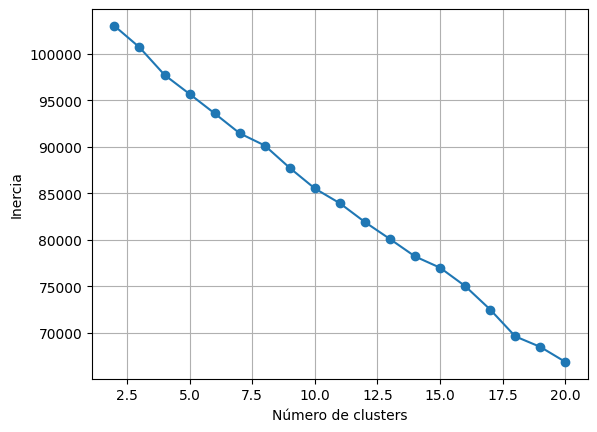

In [88]:
elbow_plot(df_scaled, "kmeans", 2, 20)

No es muy diciende esta heuristica entonces se realizara el metodo de la silueta

In [85]:
def silhouette_plot(X, model, k_min=2, k_max=5):
    """
    Genera la gráfica con el coeficiente de la silueta
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    scores = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_)
        scores.append(score)
    
    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clusters')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

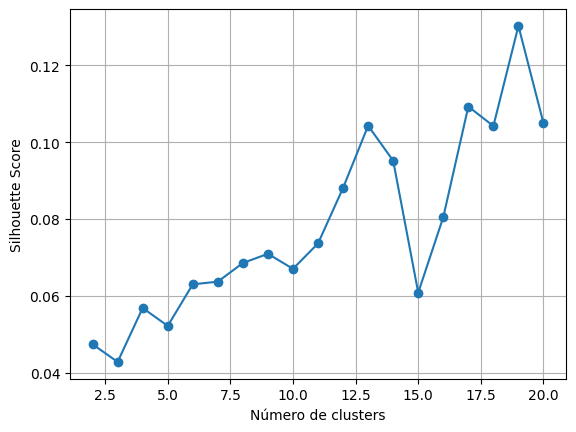

In [87]:
silhouette_plot(df_scaled, "kmeans", 2, 20)